In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Numerical

C:\Users\Morty\AppData\Local\Temp/ipykernel_19508/4277023884.py:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(tm.T,xm.T,u)


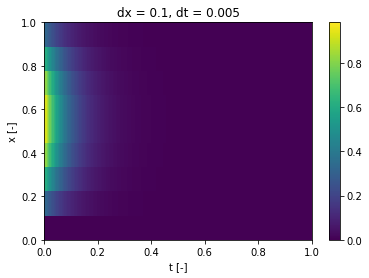

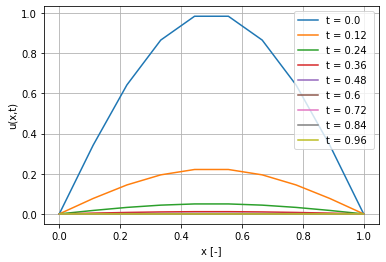

C:\Users\Morty\AppData\Local\Temp/ipykernel_19508/4277023884.py:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(tm.T,xm.T,u)


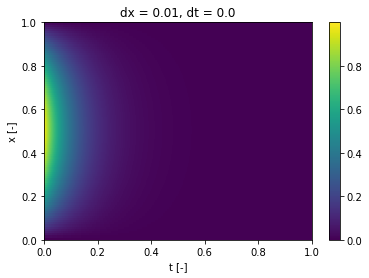

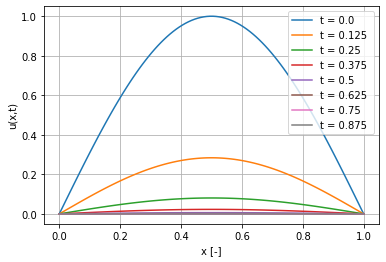

In [2]:
L = 1
x0 = 0
t_term = 1
dx1 = 1/10
dx2 = 1/100


dx = [dx1,dx2]




ulist = []
for elem in dx:
    dt = elem**2 * 0.5
    
    Nt = int(t_term/dt)
    Nx = int(L/elem)

    x  = np.linspace(x0,L,Nx)
    t = np.linspace(0,t_term,Nt)


    u = np.zeros((Nx,Nt))

    u[:,0] = np.sin(np.pi*x) 
    u[0,:] = 0
    u[-1,:] = 0

    for j in range(0,Nt-1):
        for i in range(1,Nx-1):
    
            uxx = (u[i+1,j] - 2*u[i,j] + u[i-1,j])/(elem**2)
            u[i,j+1] = uxx*dt+u[i,j]
    xm,tm = np.meshgrid(x,t)
    plt.pcolormesh(tm.T,xm.T,u)
    plt.xlabel("t [-]")
    plt.ylabel("x [-]")
    plt.colorbar()
    plt.title(f"dx = {elem}, dt = {np.round(dt,decimals = 4)}")
    plt.show()
    
    step = int(Nt/8)
    plot_times = np.arange(0,Nt,step)
   
    for i in plot_times:
        
        plt.plot(x,u[:,i],label = f"t = {np.round(dt*i,decimals = 4)} ")
    plt.legend()
    plt.ylabel("u(x,t)")
    plt.xlabel("x [-]")
    plt.grid()
    plt.show()
    ulist.append(u)
    


## Analytical

C:\Users\Morty\AppData\Local\Temp/ipykernel_19508/2543675235.py:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(tm.T,xm.T,ua)


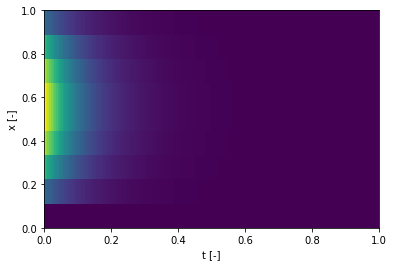

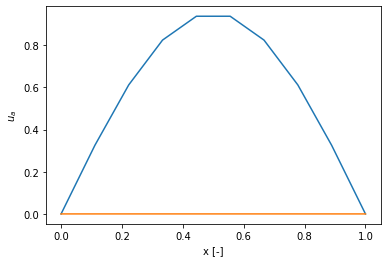

C:\Users\Morty\AppData\Local\Temp/ipykernel_19508/2543675235.py:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(tm.T,xm.T,ua)


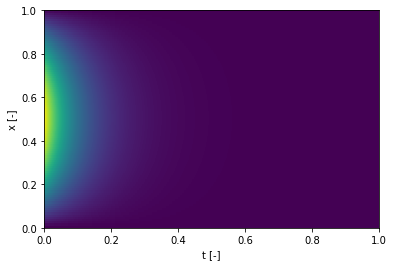

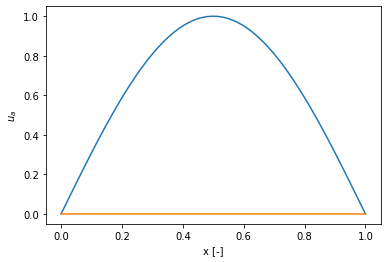

In [3]:

dx1 = 1/10
dx2 = 1/100


dx = [dx1,dx2]


def u_analytical(x,t):
    return np.sin(np.pi * x) * np.exp(-np.pi**2 * t)

ualist = []

for elem in dx:
    dt = elem**2 * 0.5
    
    Nt = int(t_term/dt)
    Nx = int(L/elem)

    x  = np.linspace(x0,L,Nx)
    t = np.linspace(0,t_term,Nt)


    ua = np.zeros((Nx,Nt))
    
    for i,xi in np.ndenumerate(x):
        for j,tj in np.ndenumerate(t):
            ua[i,j] = u_analytical(xi,tj)
    ualist.append(ua)
    xm,tm = np.meshgrid(x,t)
    plt.pcolormesh(tm.T,xm.T,ua)
    plt.xlabel("t [-]")
    plt.ylabel("x [-]")
    plt.show()
    
    plt.plot(x,ua[:,1])
    plt.plot(x,ua[:,-1])
    plt.xlabel("x [-]")
    plt.ylabel("$u_a$")
    plt.show()

In [7]:

denominator0 = ulist[0].shape[0] *ulist[0].shape[1]
denominator1 = ulist[1].shape[0] * ulist[1].shape[1]

print(ulist[0].shape,ualist[0].shape)
print(ulist[1].shape,ualist[1].shape)
u0 = np.array(ulist[0])
ua0 = np.array(ualist[0])


u1 = np.array(ulist[1])
ua1 = np.array(ualist[1])

print(1/denominator0 * np.sum(u0-ua0)**2)
print(1/denominator1 * np.sum(u1-ua1)**2)

(10, 199) (10, 199)
(100, 20000) (100, 20000)
0.25641828510953174
3.2631094525738766
